# 파이썬 4강: 데이터 가공과 시각화

- 목표: `Pandas`를 이용한 데이터 가공과 `Seaborn` 을 이용한 통계 그래프

# I부: `Pandas`를 이용한 데이터 가공

<img src="figure/snu_ui_download.png" width="100"/>

### 서울대학교 통계학과 김지수 교수

## 데이터 과학 Workflow

![](figure/data-science.png)
    

- 데이터 가공(Data Wragling): 자료를 읽고 정리하여(Tidy) 변환(Transform)
- 데이터 이해: 탐색적 자료분석(Exploratory Data Analysis)과 모형 적합, 자료 변환의 *반복*
- 소통(Communicate): 전문적인 보고서와 재현가능한 분석



## 자료 가공의 주요 도구 

- `numpy`: 수치형 자료의 계산에 특화
- `pandas`: 분석을 목적에 둔 "자료"로서의 데이터 처리
    - `R` tidyverse의 `dplyr`, `tidyr` 패키지에 대응됨.

## 자료 시각화의 주요 도구 

- `matplotlib`: 가장 기본적이고 범용적인 그래프 도구
- `Seaborn`: 통계적 데이터 시각화 (Statistical Data Visualization). 
    - `matplotlib`에 기반함. 
    - `R` tidyverse의 `ggplot2` 패키지에 대응됨.
    

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.stats as sc # 고급 통계 확률 계산 
import seaborn as sns

# Chapter I: 자료 가공 


# 1. 단정한 데이터 
  

- 단정한 데이터(tidy data)는 값(value)이 행렬의 형태로 들어가 있는 모양이다.
    + 값은 숫자일 수도, 문자일 수도, 혹은 더 복잡한 형태(emails, videos, photos, 사물)일 수도 있다. 
    + 행렬의 각 행은 자료의 기본 유닛(사람, 날짜, 모델 등)이다.
    + 행렬의 각 열은 변수(키, 기온, mpg 등)이다.
    
- 일반적으로 생각하는 테이블 데이터가 곧 단정한 데이터. 
    
- 단정한 자료의 예
    - 피셔의 아이리스 데이터 (150송이의 아이리스의 꽃잎 너비, 길이와 꽃받침 너비, 길이, 그리고 아이리스의 세부 종 이름)

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![](figure/tidy1.png)
![](figure/tidy2.png)


![](figure/tidy3.png)

- `pandas` DataFrame의 계산은 기본적으로 벡터와 벡터의 원소별 계산임


#### Pandas DataFrame
- 단정한 데이터는 대부분 `pandas` 데이터프레임 형태로 저장됨



##### 연습

- 연습 1: `iris` 데이터가 DataFrame 인지 확인하라. 
- 연습 2: `iris` 데이터의 한 변수 (예: column id 4 `species`)는 Series 타입이다. 이를 확인하라. 

In [3]:
# 연습 1 
type(iris)

# 연습 2 
species = iris.iloc[:, 4]
type(species)

pandas.core.series.Series

## 1.1 테이블 데이터 읽기와 쓰기

- `pandas`의 약자는 `pd`로 지정되어 있음을 기억하자.
- `pd.read_*`와 `pd.write_*`를 이용 (wildcard 문자인 `*`에 파일확장자 대입)

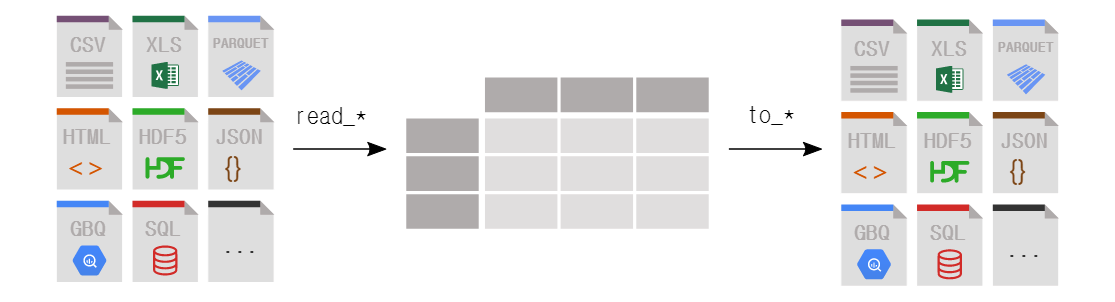




####  예: `csv` (comma-separated values) 형태로 저장된 파일을 읽는다. 

In [4]:
storms = pd.read_csv("data/storms.csv")
storms

,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
1,2,Alex,45,1009,1998-07-27
2,3,Allison,65,1005,1995-06-03
3,4,Ana,40,1013,1997-06-30
4,5,Arlene,50,1010,1999-06-11
5,6,Arthur,45,1010,1996-06-17


#### 예: `storms`데이터를 엑셀로 저장한다.

In [5]:
storms.to_excel("data/storms.xlsx", sheet_name="storms data", index=False)

#### 예: `stroms.xlsx`의 데이터를 다시 읽어 `storms_from_excel`로 저장한다.

In [6]:
storms_from_excel = pd.read_excel("data/storms.xlsx")
storms_from_excel

,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
1,2,Alex,45,1009,1998-07-27
2,3,Allison,65,1005,1995-06-03
3,4,Ana,40,1013,1997-06-30
4,5,Arlene,50,1010,1999-06-11
5,6,Arthur,45,1010,1996-06-17


## 1.2 데이터프레임 조사 

아래 예의 `df` 대신 다른 DataFrame 이름 (예를 들어 `storms`)을 넣어 그 데이터에 대해 조사한다. 

- `df.head()`: 첫 다섯 줄 출력
- `df.head(n = 2)` 또는 `df.head()`: 첫 두 줄 출력 
- `df.tail()` : 마지막 다섯 줄 출력 
- `df.tail(3)` : 마지막 세 줄 출력
- `df.dtypes` : 데이터프레임의 모든 변수에 대한 데이터 타입만 출력
- `df.shape` :  데이터프레임 (테이블)의 모양 (또는 크기)에 대한 정보 출력
- `df.info()` : 데이터프레임에 대한 간략한 정보 출력

In [7]:
storms.head(2)
storms.tail()
storms.dtypes
storms.shape
storms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6 non-null      int64 
 1   storm       6 non-null      object
 2   wind        6 non-null      int64 
 3   pressure    6 non-null      int64 
 4   date        6 non-null      object
dtypes: int64(3), object(2)
memory usage: 372.0+ bytes


# 2. `pandas` 패키지를 이용한 자료의 가공과 정보 추출 


- 자료가 단정한 형태로 있다고 가정하자 (행-관측유닛; 열-변수). 

- 자료 가공은 몇 가지 간단한 작업의 연속적인 적용이다. 

1. query observations: 데이터에서 특정한 행(rows; 관측유닛)을 추린다
2. sort observations: 데이터의 행(관측값들)을 정렬한다 
3. filter variables: 데이터에서 특정한 변수 (열;columns)를 고른다
4. assign (new values): 데이터에 새로운 변수를 정하고 계산한다. 
5. aggregate: 데이터를 한 줄로 축약한다. 

- 다섯 가지 작업의 연쇄로 대부분의 정보를 추출할 수 있다. 

## 2.1. 관측값 추리기

- `df.loc[]` 와 `df.iloc[]`로 행 (또는 열, 또는 행과 열) 선택 

    - 연습 1: `storms` 데이터의 행 0 (첫번째 줄) 부터 행 2 (세번째 줄)까지 선택하라.
    - 연습 2: `storms` 데이터의 첫 네 줄과 `storm`, `wind` 변수의 값만을 선택하라.  




 

In [8]:
#1
storms.iloc[0:3] # 0:2가 아니라 0:3임에 유의하자. 앞자리는 포함, 뒤는 불포함 
storms.head(3) 

#2
storms.iloc[0:4, 1:3] # 여기도 마찬가지로 1:3 으로 해야 1:2 열을 선택함. 

,storm,wind
0,Alberto,110
1,Alex,45
2,Allison,65
3,Ana,40



### 2.1.1 통계분석 시 데이터를 바라보는 관점
    
 - 행(관측값)들은 모두 특별한 의미가 없는 여러 관측값 중의 하나
 - 열(변수)들은 의미가 있는 특별한 값
 - 따라서 관측값을 선택할 때는 systematic 하게 index 별로 0:10로 하기보다, 특정한 조건에 따라 관측값을 추리는 경우가 더 많다. 
 - 질문(query)의 답 (True, False) 에 따라 데이터 선택 
    

![](figure/image-20220705153126825.png)

`storms.query('wind >= 50')`





### 2.1.2  관측값 추리기 `df[조건]` 또는 `df.query(조건)`을 이용한다. 
- 이 때의 조건은 데이터의 값과 관련되어 있음. 예를 들면 storms wind speed가 60마일 이상인 (`storms.wind >= 60`) 경우. 

    - 연습 1: `storms` 데이터에서 wind speed가 60마일 이상인 item들의 Boolean series를 만들어라
    - 연습 2: `storms[storms.wind >= 60]`의 결과를 확인하라.
    - 연습 3: `df.query('wind >= 60')`를 이용하여, 연습 2의 결과와 같은 결과를 도출하자.
    - 연습 4 (여러 개의 조건): `storms` 데이터에서 wind speed가 60마일 이상이며, 기압이 1006 이상인 item을 골라내어라. 
    - 연습 5 (여러 개의 조건): `storms` 데이터에서 wind speed가 50마일 미만이며, 이름이 "Alberto","Allison", "Alex" 중의 하나인 item을 골라내어라. 
    

In [9]:
#1
storms.wind >= 60

#2 
storms[storms.wind >= 60]

#3
storms.query('wind >= 60')

#4
storms[(storms.wind >= 60) & (storms.pressure >= 1006)] # 괄호, & 확인
storms[(storms['wind'] >= 60) & (storms.pressure >= 1006)] # 괄호, & 확인
storms.query('wind >= 60 and pressure >= 1006')

#5 
storms[(storms['wind'] >= 50) & storms['storm'].isin(['Alberto','Allison', 'Alex'])]
storms.query('wind >= 50 and storm == ["Alberto", "Allison", "Alex"]')

,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
2,3,Allison,65,1005,1995-06-03


### 2.1.3 표본 추출 

관측값 중 일부를 랜덤하게 골라야 할 때도 있음 

- `df.sample(frac = 0.5)`: 50%의 자료를 랜덤하게 선택
- `df.sample(n = 10)` : 10개의 자료를 랜덤하게 선택

    - 연습 1: `storms` 데이터에서 3개의 자료를 랜덤하게 선택하여라. 
    - 연습 2: `storms` 데이터에서 25%의 자료를 랜덤하게 선택하여라. 
    - 연습 3: `storms` 데이터에서 모두 10개의 자료를 복원추출하여라. (힌트: Shift + Tab 으로 매뉴얼 보기 (Colab: 메뉴의 [도구] - [설정] - [편집기] 에서 "코드 완성 제안을 자동으로 표시" 부분을 해제하여 Shift + Tab 활성화 가능)

    
> 복원추출: 한번 뽑은 아이템을 다시 뽑을 수 있음. 
>
> 비복원추출: 한번 뽑은 아이템은 다시 뽑히지 않음. 
>
> 예를 들어, {A,B,C} 중 두 아이템을 비복원추출한다면 (A,B), (A,C), (B,C) 중 하나의 결과. 그러나 {A,B,C} 중 두 아이템을 복원추출한다면 (A,A), (B,B), (C,C)도 추출될 수 있음.     

In [10]:
#1 
storms.sample(3)

#2 
storms.sample(frac=0.25)

#3 
storms.sample(10, replace=True) 

,Unnamed: 0,storm,wind,pressure,date
4,5,Arlene,50,1010,1999-06-11
2,3,Allison,65,1005,1995-06-03
2,3,Allison,65,1005,1995-06-03
2,3,Allison,65,1005,1995-06-03
4,5,Arlene,50,1010,1999-06-11
1,2,Alex,45,1009,1998-07-27
3,4,Ana,40,1013,1997-06-30
3,4,Ana,40,1013,1997-06-30
0,1,Alberto,110,1007,2000-08-03
2,3,Allison,65,1005,1995-06-03


## 2.2 데이터 정렬

![](figure/arrange.png)

`storms.sort_values('wind')`


## 2.2.1. 사용법

`df.sort_values(      
    by,                   
    axis: 'Axis' = 0,
    ascending=True ... )`
    
 - `by = 'wind'`: 정렬 기준이 되는 변수 이름
 - `axis = 0` 0 (행)이 기본 
 - `ascending = False` 는 내림차순 정렬
 
### 연습

 - 연습 1: `storms` 데이터를 wind speed가 빠른 item부터 정렬하여라. 
 - 연습 2: `storms` 데이터를 wind speed로 느린 순으로 정렬한 뒤, 오래된 순으로 정렬하여라. 
 - 연습 3: `storms` 데이터를 wind speed가 빠른 순으로 정렬한 뒤, 오래된 순으로 정렬하여라.   
 

In [11]:
#1
storms.sort_values('wind', ascending=False)

#2
storms.sort_values(by=['wind', 'date'])

#3
storms.sort_values(by=['wind', 'date'], ascending=[False, True])


,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
2,3,Allison,65,1005,1995-06-03
4,5,Arlene,50,1010,1999-06-11
5,6,Arthur,45,1010,1996-06-17
1,2,Alex,45,1009,1998-07-27
3,4,Ana,40,1013,1997-06-30


## 2.3 변수 선택

- 데이터프레임이 클 때, 관심있는 변수만을 선택하거나, 쓸모없는 변수를 제거.
![](figure/filter.png)

1. 변수명 리스트로 선택: `storms[['storm','pressure']]`
2. loc 이용 변수 선택: `storms.loc[:,'wind':'date']`  
3. iloc 이용 컬럼 선택: `storms.iloc[:,1:]` (컬럼 1부터 끝까지 선택)
3. filter() 함수로 변수 선택: `storms.filter(['pressure','wind','date'])`
4. drop() 함수로 제거: `storms.drop(columns = 'storm')` 
5. pop() 함수로 단 한 개의 컬럼 뜯어내기: `storm_name = storms.pop('storm')` 
    + `storms` 데이터프레임에서는 `storm` 컬럼이 삭제됨과 동시에
    + `storm_name`에 `storm` 컬럼이 Series로 저장됨
    + `insert()` 함수로 Series를 데이터프레임에 추가: `insert(데이터가 삽입될 위치, '삽일될 변수 이름', 변수)`


7. filter() 함수와 정규식 이용하여 변수 필터링: `storms.filter(regex ='[sw]')` 
8. select_dtypes() 함수로 변수 타입(수치형 (`np.number`), string형 (`np.object`) 등) 별로 필터링: `storms.select_dtypes(include=np.number)`
    + `include` 또는 `exclude` 선택


In [12]:
## 예제
storms[['storm', 'pressure']]
storms.loc[:, 'wind':'date']
storms.iloc[:, 1:]
storms.filter(['pressure', 'wind', 'date'])
storms.drop(columns='storm') 
storm_name = storms.pop('storm')
storm_name
storms
storms.insert(1, 'storm', storm_name) 
storms 
storms.filter(regex='[sw]') # s 와 w 가 포함된 모든 변수명 선택 
storms.select_dtypes(include=np.number)

,Unnamed: 0,wind,pressure
0,1,110,1007
1,2,45,1009
2,3,65,1005
3,4,40,1013
4,5,50,1010
5,6,45,1010


  
> 참조: 정규식 (https://wikidocs.net/4308)
>
> 예: `regex ='[sw]'` : `[]` 사이의 문자들과 매치. 즉 "s" 또는 "w"가 포함된 문자와 매치
> 
> 예: `regex = 'da*e`' : "da"으로 시작하고 "e"로 끝나는 문자와 매치

## 2.4. 새로운 변수 생성 (assign)

![](figure/mutate.png)

- 새로운 변수 `ratio = pressure / wind` 생성하여 데이터프레임에 추가


### 2.4.1 새로운 Series 를 만들어서 추가하는 방법 

In [13]:
ratio_Series = storms.pressure / storms.wind 
storms.assign(ratio=ratio_Series)

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


### 2.4.2 한 줄로 해결하는 방법

In [14]:
storms.assign(ratio=(storms.pressure / storms.wind))

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


### 2.4.3 익명함수를 이용하는 방법

* python은 **익명** 함수 혹은 **람다** 함수라고 하는 값을 반환하는 단순한 한 문장으로 이루어진 함수를 지원한다.   
* `lambda` 예약어로 정의하며, 이는 '익명함수를 선언한다'라는 의미다.  
* 람다 함수는 데이터 분석에서 특히 편리한데, 이는 데이터를 변형하는 함수에서 인자로 함수를 받아야하는 경우가 매우 많기 때문이다.

- 일반적인 **이름이 있는** 함수는 다음과 같이 정의한다.

In [15]:
def ratio(x, y):
    return x / y

ratio(storms.pressure, storms.wind)

0     9.154545
1    22.422222
2    15.461538
3    25.325000
4    20.200000
5    22.444444
dtype: float64

In [16]:
storms.assign(ratio=ratio(storms.pressure, storms.wind))

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


또는 

In [17]:
def ratio_df(df):
    return df.pressure / df.wind

ratio_df(storms)

0     9.154545
1    22.422222
2    15.461538
3    25.325000
4    20.200000
5    22.444444
dtype: float64

In [18]:
storms.assign(ratio=ratio_df(storms))

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


- `ratio_df` 함수는 데이터프레임을 인자로 받아 그 안의 `pressure`와 `wind`의 비를 계산하는 함수이지만, 일회용이다. 

- 다음과 같이 *이름이 없는* 익명함수인 람다함수로 지정할 수 있다.

In [19]:
storms.assign(ratio=(lambda df: df.pressure / df.wind))

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


### 2.4.4 연습

1. `storms` 데이터프레임에 `ratio`와 `wind_km` (km 단위로 변환한 wind speed)의 두 변수를 추가하여 `storms1`이라는 이름으로 저장하라.
2. 두 변수가 추가된 데이터프레임 `storms1`에서 `Unnamed: 0` 컬럼과 `wind` 컬럼을 제거하여 `storms2`이라는 이름으로 저장하라.

> 참조: 1마일은 대략 1.6km다. 

In [20]:
#1 
storms1 = storms.assign(ratio=(lambda df: df.pressure / df.wind), 
              wind_df=(lambda df: df.wind * 1.6))
storms1

#2 
storms2 = storms1.drop(columns=['Unnamed: 0', 'wind'])
storms2

,storm,pressure,date,ratio,wind_df
0,Alberto,1007,2000-08-03,9.154545,176.0
1,Alex,1009,1998-07-27,22.422222,72.0
2,Allison,1005,1995-06-03,15.461538,104.0
3,Ana,1013,1997-06-30,25.325000,64.0
4,Arlene,1010,1999-06-11,20.200000,80.0
5,Arthur,1010,1996-06-17,22.444444,72.0


## 2.5 데이터 축약 (**agg**regate)

![](figure/sum1.png)

`df.대상변수명.agg(['함수명1','함수명2'])`

또는 

`df.agg(
    축약이름1 = ('대상변수명1',함수명1),
    축약이름2 = ('대상변수명2',함수명2)
)` 

In [21]:
pollution = pd.read_csv("data/pollution.csv")
pollution = pollution.iloc[:, 1:] # 첫 번째 열 삭제
pollution

,city,size,amount
0,New York,large,23
1,New York,small,14
2,London,large,22
3,London,small,16
4,Beijing,large,121
5,Beijing,small,56


In [22]:
{'mean': pollution.amount.mean(), 
 'sum': pollution.amount.sum(),
 'n': pollution.amount.count()}

{'mean': 42.0, 'sum': 252, 'n': 6}

In [23]:
pollution.amount.agg(['mean', 'sum', 'count'])

mean      42.0
sum      252.0
count      6.0
Name: amount, dtype: float64

In [24]:
pollution.agg(
  mean = ('amount', np.mean),
  sum = ('amount', np.sum), 
  n = ('amount', len)
)           # 결과가 다시 DataFrame.

,amount
mean,42.0
sum,252.0
n,6.0


#### 참고: agg에 흔히 쓰이는 함수들

|함수|설명|
|:-----|:-----------------------------------------|
|count|NA가 아닌 값의 수를 반환한다.|
|sum|NA가 아닌 값들의 합을 구한다.|
|mean|NA가 아닌 값들의 평균을 구한다.|
|median|NA가 아닌 값들의 산술 중간값을 구한다.|
|std, var|편향되지 않은(n-1을 분모로 하는) 표준편차와 분산|
|min, max| NA가 아닌 값들 중 최솟값과 최댓값|
|prod|NA가 아닌 값들의 곱|
|first, last|NA가 아닌 값들 중 첫째 값과 마지막 값|



주의점: `pandas` 옛날 버전에서는 `agg`에 함수를 사용했을 때 데이터프레임의 변수 중 함수와 타입이 맞지 않는 것들은 자동으로 제외하면서 계산이 됐으나, `pandas` 2.0 이상 버전부터는 타입 오류가 생긴다. 예를 들어 `sum`, `mean` 등과 같이 인자로 numeric 을 받는 함수일 경우, 데이터프레임에 string 변수가 있을 경우 `agg` 를 `sum`, `mean` 과 같이 사용하면 타입 오류가 생긴다. 이런 경우에는 string 변수를 미리 제거해서 numeric 변수들만 남겨놓고 `agg`를 사용하는 등의 조치를 취해야 한다.

In [25]:
# pollution.agg(['mean', 'sum'])

In [26]:
pollution[['amount']].agg(['mean', 'sum'])

,amount
mean,42.0
sum,252.0


- `agg` 대신 `describe` 함수를 이용하여 간단한 요약통계량을 얻을 수 있다.
    - 이때, 수치형 변수의 요약 통계량만 자동적으로 구한다. 



In [27]:
pollution.describe()

,amount
count,6.000000
mean,42.000000
std,41.612498
min,14.000000
25%,17.500000
50%,22.500000
75%,47.750000
max,121.000000


### 2.5.1 연습

In [28]:
storms

,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
1,2,Alex,45,1009,1998-07-27
2,3,Allison,65,1005,1995-06-03
3,4,Ana,40,1013,1997-06-30
4,5,Arlene,50,1010,1999-06-11
5,6,Arthur,45,1010,1996-06-17


 - 연습 1. `storms` 자료에서 wind speed가 50 이상인 폭풍우의 갯수와 평균 `pressure`를 구하라. 
    + 힌트: `query()` 후 `aggregate()`.

In [29]:
#1 
storms.query('wind >= 50').pressure.agg(['mean', 'count'])

(                        # () 안의 모든 코드는 한 줄로 인식됨.
    storms.
    query('wind >= 50'). 
    agg(
        count=('pressure', len),
        mean=('pressure', np.mean))
)

,pressure
count,3.000000
mean,1007.333333


### 2.5.2 그룹별 요약 (`groupby` + `agg`)

![](figure/sum2.png)



그룹 변수의 값에 따라 그룹을 지정한 뒤, 각 그룹별로 데이터 요약을 한다. 

아래의 예는 한 가지 요약 (`amount`의 평균)을 도시(`city`변수)별로 구했다.

`mean` 함수에서 `numeric_only` 옵션을 `True` 로 설정해야 numeric 변수인 `amount` 에 대해서만 `mean`이 계산된다. 데이터프레임에 numeric이 아닌 변수가 있을 때 `numeric_only` 옵션을 설정하지 않으면 `pandas` 2.0 이상 버전부터는 타입 오류가 생긴다.

In [30]:
# throws TypeError if pandas >=2.0
# pollution.groupby('city').mean()

In [31]:
pollution.groupby('city').mean(numeric_only=True)

,amount
city,
Beijing,88.5
London,19.0
New York,18.5


아래의 예는 여러 가지 요약 (`amount`의 평균, 합, 갯수)을 도시(`city`변수)별로 구했다.

In [32]:
pollution[['city', 'amount']].groupby('city').agg(['mean', 'sum', 'count'])

amount           
           mean  sum count
city                      
Beijing    88.5  177     2
London     19.0   38     2
New York   18.5   37     2

또는

In [33]:
pollution.groupby('city').agg(
    mean = ('amount', np.mean), 
    sum = ('amount', sum),
    count = ('amount', len)
)

,mean,sum,count
city,,,
Beijing,88.5,177,2
London,19.0,38,2
New York,18.5,37,2


### 2.5.3 변수별로 다른 요약

다음과 같이, 딕셔너리 형태의 요약 명령도 가능하다. 

`df.groupby('그룹변수').agg({
    '변수명1' : ['mean', 'min'],
    '변수명2' : ['mean', 'min', 'max']
})`

In [34]:
iris.groupby('species').agg({
    'sepal_length': ['mean', 'min'], 
    'sepal_width': ['median']
})

sepal_length      sepal_width
                   mean  min      median
species                                 
setosa            5.006  4.3         3.4
versicolor        5.936  4.9         2.8
virginica         6.588  4.9         3.0

# 3. 관계형 데이터베이스를 다루는 첫걸음

## 3.1 관계형 자료

![image.png](figure/relational-nycflights.png)

- 뉴욕시에서 2013년에 출발한 모든 비행기에 대한 자료(flights)와 airlines, airports, weather, planes에 대한 참조자료 (metadata) 


In [35]:
## read datasets
flights = pd.read_csv("data/flights.csv")
flights.drop(columns="Unnamed: 0")
flights.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [36]:
airlines = pd.read_csv("data/airlines.csv")
airlines.drop(columns="Unnamed: 0")
airlines.head()

,Unnamed: 0,carrier,name
0,1,9E,Endeavor Air Inc.
1,2,AA,American Airlines Inc.
2,3,AS,Alaska Airlines Inc.
3,4,B6,JetBlue Airways
4,5,DL,Delta Air Lines Inc.


In [37]:
airports = pd.read_csv("data/airports.csv")
airports.drop(columns="Unnamed: 0")
airports.head()

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,2,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,4,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,5,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [38]:
(flights
.query('month == 1 and day == 1 and abs(dep_delay) > 30')
[['dep_time', 'arr_time', 'carrier', 'flight', 'tailnum', 'origin', 'dest']].head())

,dep_time,arr_time,carrier,flight,tailnum,origin,dest
85,732.0,1011.0,UA,1111,N37456,EWR,MCO
96,749.0,939.0,MQ,3737,N508MQ,EWR,ORD
119,811.0,1047.0,MQ,4576,N531MQ,LGA,CLT
135,826.0,1136.0,AA,443,N3GVAA,JFK,MIA
151,848.0,1001.0,MQ,3944,N942MQ,JFK,BWI


자료의 값이 **code**로 가득차 있기 때문에 뜻을 알 수가 없다. 

### 3.1.1 원 자료와 참조자료

- 위 자료에서 `carrier = AA`가 무슨 뜻일까? 

- 참조자료 `airlines`를 보면 알 수 있다. 

In [39]:
airlines.head(2)

,Unnamed: 0,carrier,name
0,1,9E,Endeavor Air Inc.
1,2,AA,American Airlines Inc.



- AA가 American Airlines Inc.임을 원 자료 `flights`의 `carrier` 변수의 값 AA와 참조자료 `airlines`의 `carrier` 변수의 값 AA에 해당하는 열을 대조하여 알 수 있다. 

- 두 자료표의 변수 carrier 와 carrier 가 (이름이 다를 수도 있다) 두 자료표를 연결하는 열쇠(*Key*)이다.


## 3.2 자료와 연결 열쇠들

- 'carrier' 변수가 `flights` 자료와 'airlines' 자료를 연결하는 열쇠다. 

![image.png](figure/relational-nycflights.png)


### 3.2.1 두 자료표의 연결 (merge)


1. 원 자료 `flights` 의 `carrier` 변수의 값 (예를 들면, AA)이 나올 때마다,  
2. 참조자료 `airlines`의 `carrier` 변수의 값 (즉, AA)에 해당하는 `name` 변수의 값 (즉, American Airlines Inc.)을 
3. 원 자료에 더해준다. 

`pd.merge(flights, airlines, on='carrier', how='left')`

또는

`flights.merge(airlines, on='carrier', how = 'left')`

In [40]:
pd.merge(flights, airlines, on='carrier', how='left'
        )[['dep_time', 'arr_time', 'carrier','origin', 'dest', 'name']].head()

,dep_time,arr_time,carrier,origin,dest,name
0,517.0,830.0,UA,EWR,IAH,United Air Lines Inc.
1,533.0,850.0,UA,LGA,IAH,United Air Lines Inc.
2,542.0,923.0,AA,JFK,MIA,American Airlines Inc.
3,544.0,1004.0,B6,JFK,BQN,JetBlue Airways
4,554.0,812.0,DL,LGA,ATL,Delta Air Lines Inc.


In [41]:
flights.merge(airlines, on='carrier', how='left'
             )[['dep_time', 'arr_time', 'carrier', 'origin', 'dest', 'name']].head()

,dep_time,arr_time,carrier,origin,dest,name
0,517.0,830.0,UA,EWR,IAH,United Air Lines Inc.
1,533.0,850.0,UA,LGA,IAH,United Air Lines Inc.
2,542.0,923.0,AA,JFK,MIA,American Airlines Inc.
3,544.0,1004.0,B6,JFK,BQN,JetBlue Airways
4,554.0,812.0,DL,LGA,ATL,Delta Air Lines Inc.


### 3.2.2 연습

- `flights` 자료의 `dep_delay` 변수는 비행기의 출발 지연시간을 나타낸다.

- 미국의 두 대표적인 비행사인 `UA`와 `DL` 별로 비행기의 출발지연시간의 평균과 표준편차를 구하여 비교해보라. 

- 결과는 다음과 같이 나타나야 한다. 

| name | mean_delay | sd_delay |
|----------------|---------------|--------------|
|Delta Air Lines Inc. | 9.264504 | 39.73505|
|United Air Lines Inc. | 12.106073| 35.71660|

- 다음의 다섯 가지 연산을 순차적으로 적용하여 해결하자. 

    1. flights 자료의 dep_delay 변수와 carrier 변수만 선택한다.
    2. carrier 변수의 값이 `UA` 또는 `DL` 인 관측값만 고른다.
    3. carrier 에 따라 그룹을 짓는다.
    4. 그룹별로 데이터를 축약한다.
    5. 참조자료 (airlines) 를 연결하여 carrier 이름을 바꾸어 준다. 


In [42]:
# 연습 풀이 
(
 flights[['carrier', 'dep_delay']].
    query('carrier == ["UA", "DL"]').
    groupby('carrier').
    agg(
        mean_delay=('dep_delay', np.mean), 
        std_delay=('dep_delay', np.std)
    ).merge(airlines, on='carrier', how='left').drop(columns='carrier')
)  # 또는 .iloc[:,[3,1,2]]


,mean_delay,std_delay,Unnamed: 0,name
0,9.264505,39.735052,5,Delta Air Lines Inc.
1,12.106073,35.716597,12,United Air Lines Inc.


### 3.2.3 두 자료표의 연결: key 지정

* 원 자료 `flights`에 도착공항 (변수 `dest`)에 해당하는 참조자료를 더하고 싶다.
* 참조자료 `airports`에는 공항코드 변수 `faa` 가 나와있지만, 원 자료에는 공항코드가 두 변수(`origin`, `dest`)의 값으로 쓰였다. 
* 공통의 key 변수를 나타내는 `on =  ...` 대신, 원자료의 key 변수를 `left_on = ...`으로, 참조자료의 key 변수를 `right_on = ...`으로 지정한다. 


In [43]:
flights.merge(airports, left_on='dest', right_on='faa', how='left'
             )[['dep_time', 'arr_time', 'carrier', 'origin', 'dest', 'name']].head()

,dep_time,arr_time,carrier,origin,dest,name
0,517.0,830.0,UA,EWR,IAH,George Bush Intercontinental
1,533.0,850.0,UA,LGA,IAH,George Bush Intercontinental
2,542.0,923.0,AA,JFK,MIA,Miami Intl
3,544.0,1004.0,B6,JFK,BQN,NaN
4,554.0,812.0,DL,LGA,ATL,Hartsfield Jackson Atlanta Intl


### 3.2.3 left join

- 왼쪽의 원자료표의 모든 엔트리를 보존하는 자료 병합
- `merge(..., how='left', ...)`

![](figure/left.png)


### 3.2.4 inner join

- 왼쪽과 오른쪽의 두 자료표에서 공통된 엔트리만 보존하는 자료 병햡
- `merge(..., how='inner', ...)` 

![](figure/inner.png)

In [44]:
flights.merge(airports, left_on='dest', right_on='faa', how='inner'
             )[['dep_time', 'arr_time', 'carrier', 'origin', 'dest', 'name']].head()

,dep_time,arr_time,carrier,origin,dest,name
0,517.0,830.0,UA,EWR,IAH,George Bush Intercontinental
1,533.0,850.0,UA,LGA,IAH,George Bush Intercontinental
2,623.0,933.0,UA,LGA,IAH,George Bush Intercontinental
3,728.0,1041.0,UA,LGA,IAH,George Bush Intercontinental
4,739.0,1104.0,UA,EWR,IAH,George Bush Intercontinental


# I부: `pandas`이용 데이터 가공 끝

# II부: `seaborn`을 이용한 데이터 시각화에서 이어집니다. 